In [7]:
import gensim
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, MmCorpus
import matplotlib.pyplot as plt
import os
import time
import json
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'


In [6]:
os.listdir()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\sp2023stock\\TopicModeling\\src/../model/ModelingAssets/CorpusDict'

In [20]:
#input
main = os.getcwd()
model_path_asset_1mill = main + "/../model/ModelingAssets/1mill/CorpusDict"
model_path_asset = main + "/../model/ModelingAssets/CorpusDict"
model_save_path = main + "/../model/Modeling_n_Topics"

plot_save_path = main + "/../result/Evaluation//Model_Comparison_v2.2.png"


num = 25
model_path_asset_spenum = model_path_asset_1mill+str(num)
print(main)


E:\sp2023stock\TopicModeling\src


In [22]:
# Path to save the plot
print("Setting path plotting - model")

print("Dataset loading  dictionary - corpus - json")
# Load the dictionary and corpus
dictionary = Dictionary.load(f'{model_path_asset_spenum}/dictionary.gensim')
corpus = MmCorpus(f'{model_path_asset_spenum}/corpus.mm')
json_file_path = f'{model_path_asset_spenum}/dataset_{num}.json'

with open(json_file_path, 'r', encoding='utf-8') as json_file:
    dataset = json.load(json_file)
    
print(f"Dataset loaded - dictionary {len(dictionary)} - corpus {len(corpus)} - json")


Setting path plotting - model
Dataset loading  dictionary - corpus - json
Dataset loaded - dictionary 127737 - corpus 286816 - json


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'
Starting evaluation for 100 topics
Model with 100 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n100_passes1000_size25.gensim
Topics: 100, Coherence c_v: 0.5448227003423093, Coherence u_mass: -3.502769035627531
Number of Topics: 100, Time taken: 17698.27016210556 seconds
Starting evaluation for 200 topics
Model with 200 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n200_passes1000_size25.gensim
Topics: 200, Coherence c_v: 0.5050028598553411, Coherence u_mass: -5.386217540716769
Number of Topics: 200, Time taken: 27448.04470229149 seconds
Starting evaluation for 300 topics
Model with 300 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n300_passes1000_size25.gensim
Topics: 300, Coherence c_v: 0.5000981760213536, Coherence u_mass: -6.6125643570636585
Number of Topics: 300, Time taken: 39098.195788145065 seconds
Sta

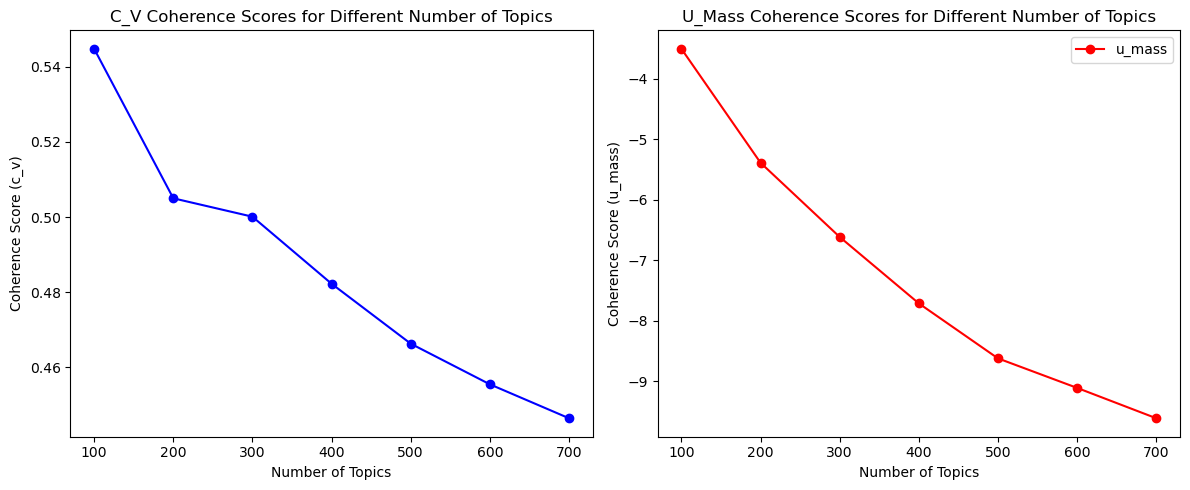

Evaluation complete.


In [60]:
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'

num_topics_list = range(100, 800, 100)

coherences_cv = []
coherences_umass = []
total_time = []

for topics in num_topics_list:
    print(f'Starting evaluation for {topics} topics')
    start_time = time.time()

    # Initialize and train the LDA model
    lda = gensim.models.ldamulticore.LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        num_topics=topics, 
        iterations= 1000, 
        workers =os.cpu_count() - 1 )
  
    model_filename = os.path.join(model_save_path, f'lda_model_n{topics}_passes{total_passes}_size{num}.gensim')
    lda.save(model_filename)
    print(f'Model with {topics} topics saved to {model_filename}')

    # Calculate coherence c_v
    coherence_model_lda_cv = CoherenceModel(model=lda, texts=dataset, dictionary=dictionary, coherence='c_v')
    coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    coherences_cv.append(coherence_lda_cv)

    # Calculate coherence U_mass
    coherence_model_lda_umass = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_lda_umass = coherence_model_lda_umass.get_coherence()
    coherences_umass.append(coherence_lda_umass)

    print(f"Topics: {topics}, Coherence c_v: {coherence_lda_cv}, Coherence u_mass: {coherence_lda_umass}")

    end_time = time.time()
    time_taken = end_time - start_time
    total_time.append(time_taken)
    print(f"Number of Topics: {topics}, Time taken: {time_taken} seconds")

# Plotting the Coherence Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_topics_list, coherences_cv, marker='o', color='b', label='c_v')
plt.title('C_V Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')

plt.subplot(1, 2, 2)
plt.plot(num_topics_list, coherences_umass, marker='o', color='r', label='u_mass')
plt.title('U_Mass Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.legend()

plt.tight_layout()
plt.savefig(plot_save_path)
plt.show()

print("Evaluation complete.")


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'
Starting evaluation for 100 topics
Model with 100 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n100_iteration1000_size25.gensim
Topics: 100, Coherence c_v: 0.36152565096960687, Coherence u_mass: -1.8540055779926725
Number of Topics: 100, Time taken: 106.73065829277039 seconds
Starting evaluation for 200 topics
Model with 200 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n200_iteration1000_size25.gensim
Topics: 200, Coherence c_v: 0.36272728362397216, Coherence u_mass: -1.839025571027185
Number of Topics: 200, Time taken: 140.80712795257568 seconds
Starting evaluation for 300 topics
Model with 300 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n300_iteration1000_size25.gensim
Topics: 300, Coherence c_v: 0.36422412982594493, Coherence u_mass: -2.0675737200566937
Number of Topics: 300, Time taken: 185.39167380332

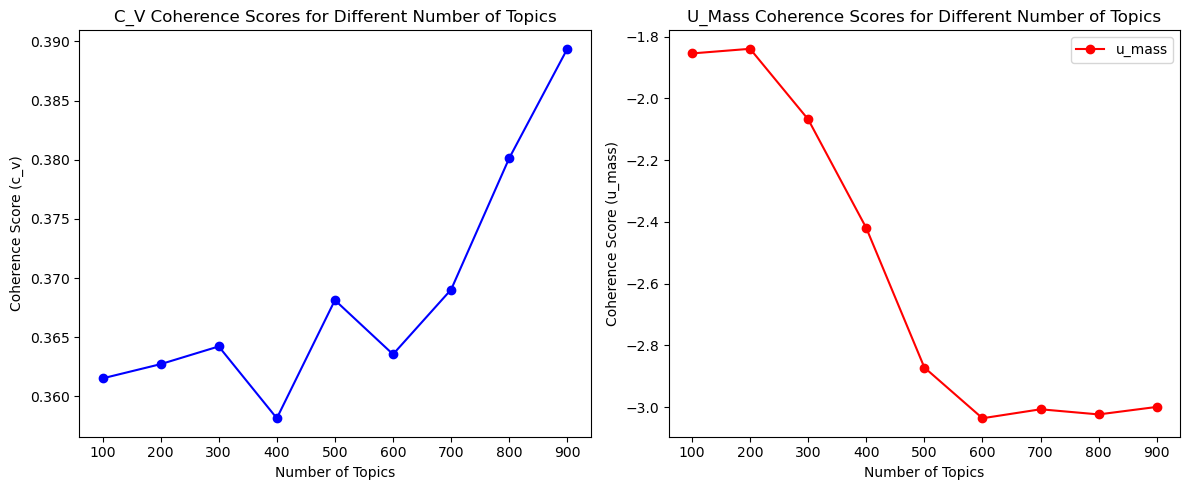

Evaluation complete.


In [8]:
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'

num_topics_list = range(100, 1000, 100)
total_iterations = 1000
coherences_cv = []
coherences_umass = []
total_time = []

for topics in num_topics_list:
    print(f'Starting evaluation for {topics} topics')
    start_time = time.time()

    # Initialize and train the LDA model
    lda = gensim.models.ldamulticore.LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        num_topics=topics, 
        iterations= total_iterations, 
        workers =os.cpu_count() - 1 )
  
    model_filename = os.path.join(model_save_path, f'lda_model_n{topics}_iteration{total_iterations}_size{num}.gensim')
    lda.save(model_filename)
    print(f'Model with {topics} topics saved to {model_filename}')

    # Calculate coherence c_v
    coherence_model_lda_cv = CoherenceModel(model=lda, texts=dataset, dictionary=dictionary, coherence='c_v')
    coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    coherences_cv.append(coherence_lda_cv)

    # Calculate coherence U_mass
    coherence_model_lda_umass = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_lda_umass = coherence_model_lda_umass.get_coherence()
    coherences_umass.append(coherence_lda_umass)

    print(f"Topics: {topics}, Coherence c_v: {coherence_lda_cv}, Coherence u_mass: {coherence_lda_umass}")

    end_time = time.time()
    time_taken = end_time - start_time
    total_time.append(time_taken)
    print(f"Number of Topics: {topics}, Time taken: {time_taken} seconds")

# Plotting the Coherence Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_topics_list, coherences_cv, marker='o', color='b', label='c_v')
plt.title('C_V Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')

plt.subplot(1, 2, 2)
plt.plot(num_topics_list, coherences_umass, marker='o', color='r', label='u_mass')
plt.title('U_Mass Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.legend()

plt.tight_layout()
plt.savefig(plot_save_path)
plt.show()

print("Evaluation complete.")


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'
Starting evaluation for 100 topics
Model with 100 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n100_iteration1000_size25.gensim
----------------------------------------------
Number of Topics: (100,) Process completed. Total runtime:  0h 1m 47s


Coherence c_v: 0.362730955995636 | Coherence u_mass: -1.7830363241709566
----------------------------------------------




Starting evaluation for 300 topics
Model with 300 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n300_iteration1000_size25.gensim
----------------------------------------------
Number of Topics: (300,) Process completed. Total runtime:  0h 3m 3s


Coherence c_v: 0.35770368259338586 | Coherence u_mass: -2.081390189053877
----------------------------------------------




Starting evaluation for 500 topics
Model with 500 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_

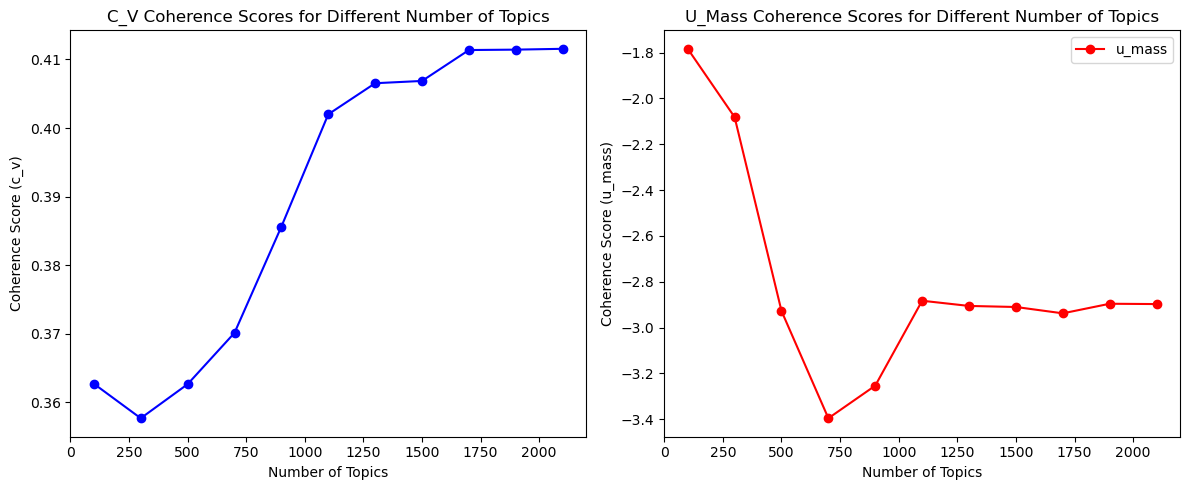

Evaluation complete.


In [5]:
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'

num_topics_list = range(100, 2300, 200)
total_iterations = 1000
coherences_cv = []
coherences_umass = []
total_time = []

for topics in num_topics_list:
    print(f'Starting evaluation for {topics} topics')
    start_time = time.time()

    # Initialize and train the LDA model
    lda = gensim.models.ldamulticore.LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        num_topics=topics, 
        iterations= total_iterations, 
        workers =os.cpu_count() - 1 )
  
    model_filename = os.path.join(model_save_path, f'lda_model_n{topics}_iteration{total_iterations}_size{num}.gensim')
    lda.save(model_filename)
    print(f'Model with {topics} topics saved to {model_filename}')

    # Calculate coherence c_v
    coherence_model_lda_cv = CoherenceModel(model=lda, texts=dataset, dictionary=dictionary, coherence='c_v')
    coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    coherences_cv.append(coherence_lda_cv)

    # Calculate coherence U_mass
    coherence_model_lda_umass = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_lda_umass = coherence_model_lda_umass.get_coherence()
    coherences_umass.append(coherence_lda_umass)



    # Process completed successfully
    end_time = time.time()
    
    time_taken = end_time - start_time
    total_time.append(time_taken)
    def format_duration(seconds):
        """Convert seconds to hours, minutes, and seconds."""
        hours = seconds // 3600
        minutes = (seconds % 3600) // 60
        seconds = seconds % 60
        return f"{int(hours)}h {int(minutes)}m {int(seconds)}s"
        
    print("----------------------------------------------")
    print(f"Number of Topics: {topics,} Process completed. Total runtime: ", format_duration(end_time - start_time))
    print("\n")
    print(f"Coherence c_v: {coherence_lda_cv} | Coherence u_mass: {coherence_lda_umass}")
    print("----------------------------------------------")
    print("\n")
    print("\n")


# Plotting the Coherence Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_topics_list, coherences_cv, marker='o', color='b', label='c_v')
plt.title('C_V Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')

plt.subplot(1, 2, 2)
plt.plot(num_topics_list, coherences_umass, marker='o', color='r', label='u_mass')
plt.title('U_Mass Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.legend()

plt.tight_layout()
plt.savefig(plot_save_path)
plt.show()

print("Evaluation complete.")


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'
----------------------------------------------
Dataset loaded for evaluate using dataset -> dictionary 127737 - corpus 286816 (25%)
----------------------------------------------


Starting evaluation for 100 topics
Model with 100 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n100_iteration2000_size25.gensim
----------------------------------------------
Number of Topics: (100,) Process completed. Total runtime:  0h 3m 36s


Coherence c_v: 0.45367082122495483 | Coherence u_mass: -2.2496400033055295
----------------------------------------------


Starting evaluation for 200 topics
Model with 200 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n200_iteration2000_size25.gensim
----------------------------------------------
Number of Topics: (200,) Process completed. Total runtime:  0h 5m 7s


Coherence c_v: 0.4324934621279016 | Coherence u_mass: -2.5054

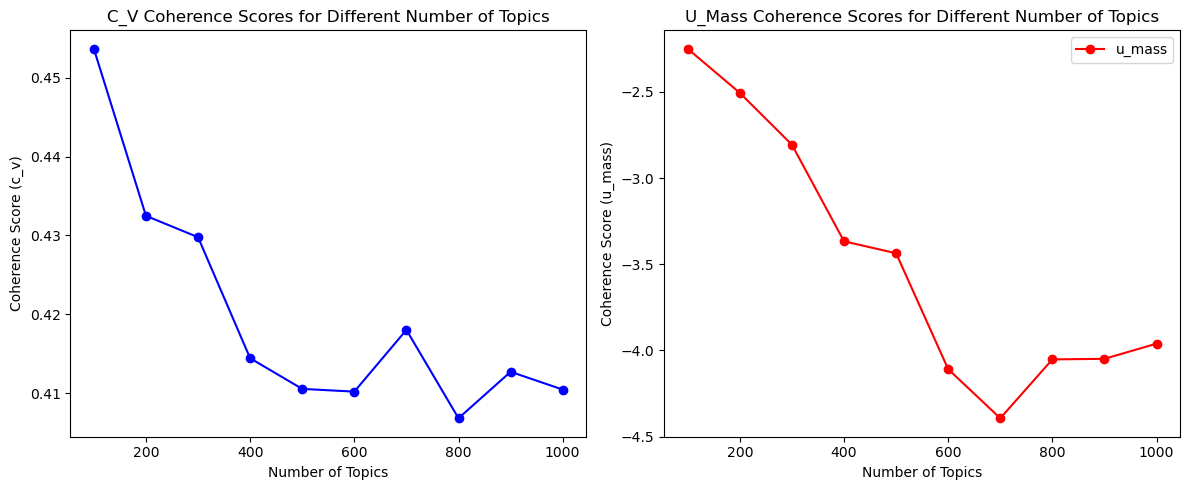

Evaluation complete.


In [27]:
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'

num_topics_list = range(100, 1100, 100)
total_iterations = 2000
coherences_cv = []
coherences_umass = []
total_time = []


print("----------------------------------------------")
print(f"Dataset loaded for evaluate using dataset -> dictionary {len(dictionary)} - corpus {len(corpus)} ({num}%)")
print("----------------------------------------------")
print("\n")


for topics in num_topics_list:
    print(f'Starting evaluation for {topics} topics')
    start_time = time.time()

    # Initialize and train the LDA model
    lda = gensim.models.ldamulticore.LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        num_topics=topics, 
        iterations= total_iterations, 
        workers =os.cpu_count() - 1 )
  
    model_filename = os.path.join(model_save_path, f'lda_model_n{topics}_iteration{total_iterations}_size{num}.gensim')
    lda.save(model_filename)
    print(f'Model with {topics} topics saved to {model_filename}')

    # Calculate coherence c_v
    coherence_model_lda_cv = CoherenceModel(model=lda, texts=dataset, dictionary=dictionary, coherence='c_v')
    coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    coherences_cv.append(coherence_lda_cv)

    # Calculate coherence U_mass
    coherence_model_lda_umass = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_lda_umass = coherence_model_lda_umass.get_coherence()
    coherences_umass.append(coherence_lda_umass)



    # Process completed successfully
    end_time = time.time()
    
    time_taken = end_time - start_time
    total_time.append(time_taken)
    def format_duration(seconds):
        """Convert seconds to hours, minutes, and seconds."""
        hours = seconds // 3600
        minutes = (seconds % 3600) // 60
        seconds = seconds % 60
        return f"{int(hours)}h {int(minutes)}m {int(seconds)}s"
        
    print("----------------------------------------------")
    print(f"Number of Topics: {topics,} Process completed. Total runtime: ", format_duration(end_time - start_time))
    print("\n")
    print(f"Coherence c_v: {coherence_lda_cv} | Coherence u_mass: {coherence_lda_umass}")
    print("----------------------------------------------")
    print("\n")



# Plotting the Coherence Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_topics_list, coherences_cv, marker='o', color='b', label='c_v')
plt.title('C_V Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')

plt.subplot(1, 2, 2)
plt.plot(num_topics_list, coherences_umass, marker='o', color='r', label='u_mass')
plt.title('U_Mass Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.legend()

plt.tight_layout()
plt.savefig(plot_save_path)
plt.show()

print("Evaluation complete.")


In [26]:
coherences_cv, coherences_umass)

[0.43351182278797196, 0.41313090154253806, 0.4035680764640116, 0.41869280348188764, 0.42792547363854133, 0.4405616858036426, 0.4409329199301648] [-2.2672610461617957, -2.709057790493801, -3.229522078598636, -3.9757125178073602, -4.271713294865279, -4.092461605990833, -3.9795178485251683]
